In [1]:
library(dplyr)
library(ggplot2)
library(lubridate)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



Read csv file into data frame.

In [2]:
Gradraw <- read.csv("StateLevelData.csv")

Filter out Native Hawaiian field as there are less than 10 in the state so that field is masked (throws an error if you don't filter).

In [3]:
Grad <- Gradraw %>% filter(Race!="Native Hawaiian or Other Pacific Islander") 

Create another column for Graduation Percent and turn the column into raw numbers not alpha characters like CohortGradRate column is.

In [4]:
Grad$GradPerc <- as.numeric(as.character(Grad$CohortGradRate))

Read data head.

In [5]:
head(Grad)

Datayear,Gender,FRL,Race,CohortGradRate,GradPerc
1617,Male,FRL,American Indian or Alaska Native,65.18,65.18
1617,Male,FRL,Asian,68.21,68.21
1617,Male,FRL,Black or African American,74.75,74.75
1617,Male,FRL,Hispanic,75.19,75.19
1617,Male,FRL,Two Or More Races,78.34,78.34
1617,Male,FRL,White,80.89,80.89


Filter females only.

In [6]:
gradracefemales <- Grad %>%
  filter(Gender == "Female") 

Plot line graph of females by race, free and reduced lunch vs not free and reduced lunch, with the x as the data year and the y as the graduate percentage. Do a facet wrap to include a separate line graph for each race. Set width and height of each graph to 10x10.

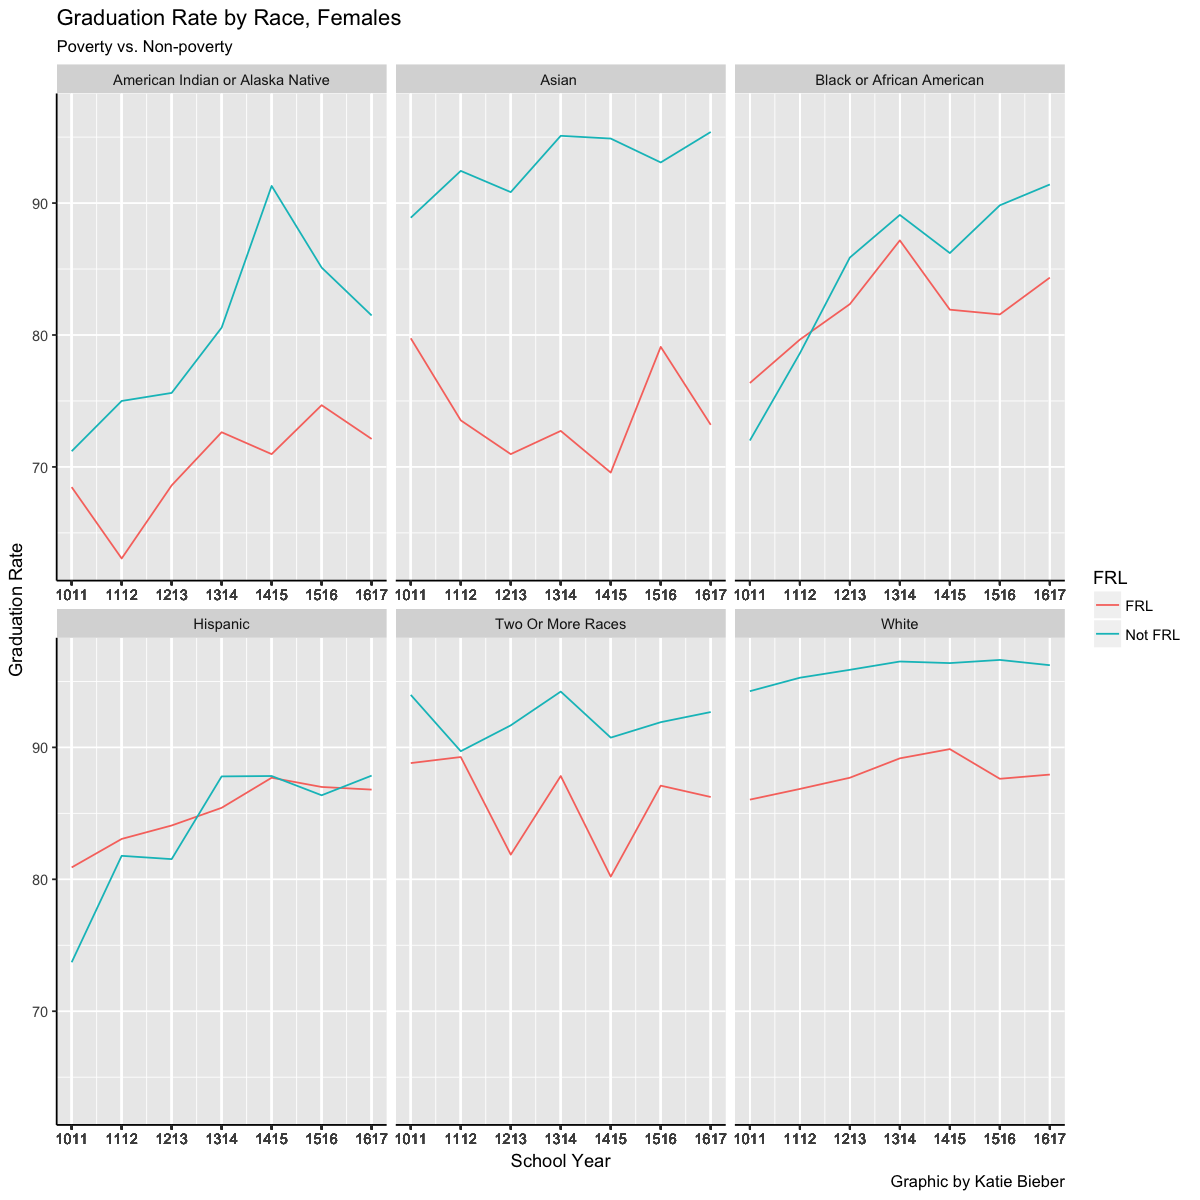

In [7]:
library(repr)
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data=gradracefemales, aes(x=Datayear, y=GradPerc, group=FRL, color=FRL)) + geom_line() + labs(x="School Year", y="Graduation Rate", title="Graduation Rate by Race, Females", subtitle="Poverty vs. Non-poverty", caption="Graphic by Katie Bieber") + facet_wrap(~Race, scales='free_x') + theme(axis.line=element_line()) + scale_x_continuous(labels=as.character(gradracefemales$Datayear),breaks=gradracefemales$Datayear)

Export file as pdf set with same 10x10 width and height.

In [8]:
ggsave("gradracefemales.pdf", width=10, height=10)